# Exploring the precipitation data for town WIZNA

The aim of this notebook is to load data and get knowledge about their characteristics. This part of the task is necessary to chose a model in order to predict future precipitation values.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Data/Merged_Data/precipitat_data_WIZNA_1951_2019.csv')

In [3]:
data.describe()

,station_ID,year,month,total_precip,SUMN_status,n_snow_fall,LDS_status,max_precip,MAXO_status,first_day_max_precip,last_day_max_precip,n_snow_cover,LDPS_status
count,828.0,828.00000,828.000000,828.00000,0.0,828.000000,0.0,828.000000,1.0,827.000000,21.000000,828.0,720.0
mean,253220190.0,1985.00000,6.500000,46.53599,NaN,3.039855,NaN,13.894444,8.0,15.206771,20.761905,0.0,8.0
std,0.0,19.92853,3.454139,31.72937,NaN,4.299783,NaN,10.395919,NaN,8.902189,8.092619,0.0,0.0
min,253220190.0,1951.00000,1.000000,0.00000,NaN,0.000000,NaN,0.000000,8.0,1.000000,7.000000,0.0,8.0
25%,253220190.0,1968.00000,3.750000,24.80000,NaN,0.000000,NaN,7.200000,8.0,8.000000,14.000000,0.0,8.0
50%,253220190.0,1985.00000,6.500000,39.75000,NaN,0.000000,NaN,11.000000,8.0,15.000000,24.000000,0.0,8.0
75%,253220190.0,2002.00000,9.250000,60.15000,NaN,5.250000,NaN,17.750000,8.0,23.000000,26.000000,0.0,8.0
max,253220190.0,2019.00000,12.000000,255.30000,NaN,23.000000,NaN,90.700000,8.0,31.000000,31.000000,0.0,8.0


The field "total_precip", which is the most importan from this analysis point of view, has no missing values.
Only one field has a missing value: firsr_day_max_precip

# Data visualisation
Let's see how the line plot of Total monthly precipitation looks like

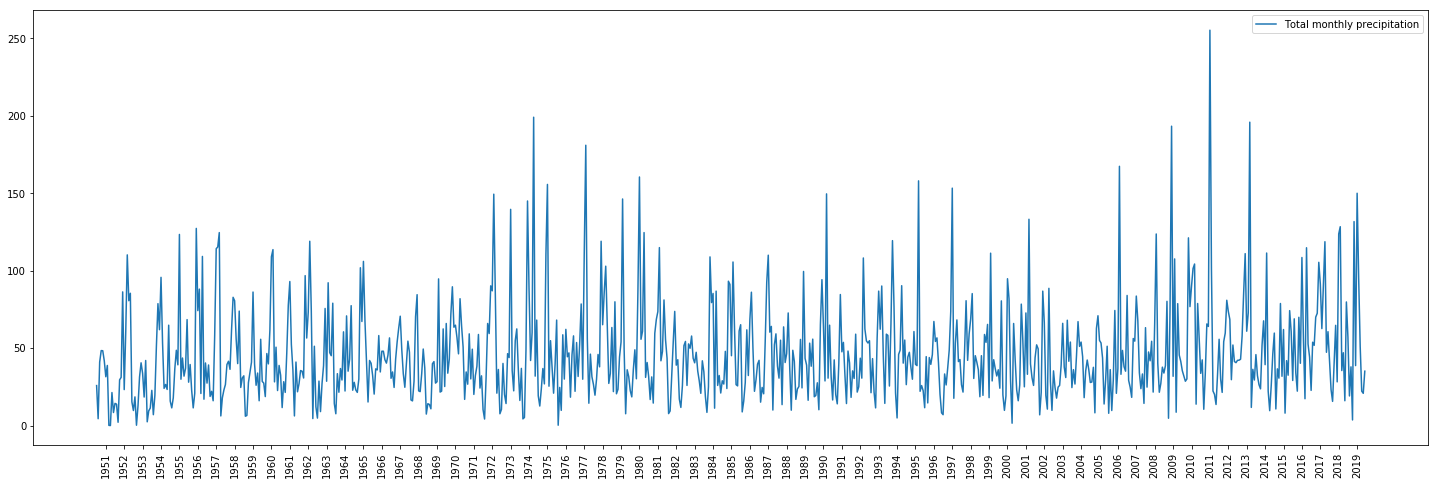

In [4]:
plt.figure(figsize=(25, 8))
x = data.index
y = data.total_precip
x_labels_index = data.iloc[6::12].index
x_label = data.iloc[6::12]['year']
plt.xticks(x_labels_index, x_label, rotation=90) 
plt.plot(x, y, label='Total monthly precipitation')
plt.legend()
plt.show()

### Figure 1. Lineplot of Total monthly precipitation over the years

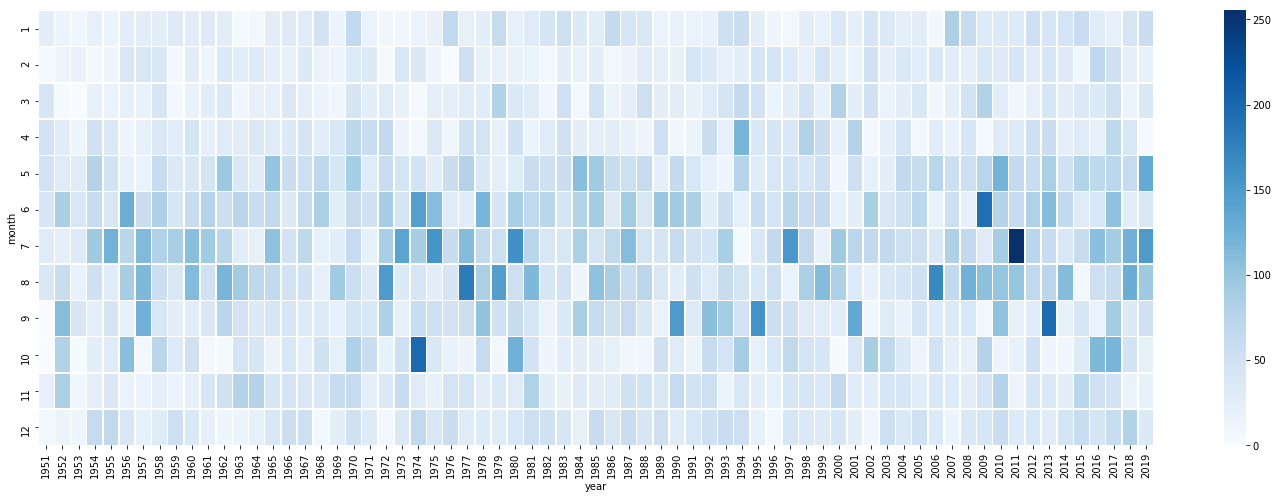

In [5]:
# heat map
data_for_heatmap = data.pivot('month', 'year', 'total_precip')
plt.figure(figsize=(25,8))
sns.heatmap(data_for_heatmap, linewidths=0.5, cmap='Blues') # cmap='Blues'
plt.show()

### Figure 2. Heatmap of total monthly precipitation 
<br/>
No evident trend can be seen in the Figure 1 and Figure 2. The maximum values of Total monthly precipitation can be observed  
over recent 13 years during summer months but this does not prove existance of trend.

## Searching for trend
Let's investigate the Total yearly precipitation

In [6]:
total_yearly_precip = data.groupby(['year']).agg({"total_precip":["sum", "std", "mean", "max", "count"]}).reset_index()

In [7]:
total_yearly_precip#[['mean','std']]


year total_precip                                   
                  sum        std       mean    max count
0   1951        309.8  18.617286  25.816667   48.4    12
1   1952        552.3  36.470439  46.025000  110.2    12
2   1953        230.4  14.348582  19.200000   42.0    12
3   1954        529.1  27.525375  44.091667   95.7    12
4   1955        503.8  29.972710  41.983333  123.4    12
5   1956        599.0  39.602521  49.916667  127.3    12
6   1957        582.7  43.915072  48.558333  124.6    12
7   1958        594.0  20.882050  49.500000   82.8    12
8   1959        404.9  21.839558  33.741667   86.2    12
9   1960        585.3  31.713637  48.775000  113.6    12
10  1961        468.6  25.680644  39.050000   93.0    12
11  1962        615.5  34.278179  51.291667  119.0    12
12  1963        490.1  28.400623  40.841667   92.2    12
13  1964        460.5  21.178468  38.375000   77.4    12
14  1965        584.2  30.567149  48.683333  106.0    12
15  1966        498.8  10.624529  41.566667   58.1    12
16  1967        521.2  14.937161  43.433333   70.6    12
17  1968        435.0  23.131934  36.250000   84.5    12
18  1969        401.5  24.069085  33.458333   94.7    12
19  1970        732.4  16.037362  61.033333   89.6    12
20  1971        422.6  13.954200  35.216667   59.2    12
21  1972        645.4  43.674662  53.783333  149.4    12
22  1973        525.9  34.122537  43.825000  139.6    12
23  1974        745.4  58.124441  62.116667  199.1    12
24  1975        564.5  42.848432  47.041667  155.7    12
25  1976        466.4  22.013068  38.866667   68.1    12
26  1977        708.6  46.668298  59.050000  181.0    12
27  1978        656.9  32.769011  54.741667  119.0    12
28  1979        578.2  36.994615  48.183333  146.3    12
29  1980        716.6  43.635053  59.716667  160.5    12
..   ...          ...        ...        ...    ...   ...
39  1990        604.2  40.091452  50.350000  149.6    12
40  1991        453.7  20.458759  37.808333   84.6    12
41  1992        542.2  24.933068  45.183333  108.2    12
42  1993        566.5  26.352004  47.208333   90.1    12
43  1994        651.5  31.408756  54.291667  119.4    12
44  1995        552.8  37.055568  46.066667  158.0    12
45  1996        446.6  19.214333  37.216667   67.2    12
46  1997        601.9  37.680172  50.158333  153.3    12
47  1998        583.9  20.698900  48.658333   85.2    12
48  1999        530.4  26.366956  44.200000  111.3    12
49  2000        504.8  31.112708  42.066667   94.8    12
50  2001        559.2  33.773201  46.600000  133.2    12
51  2002        484.0  29.039764  40.333333   88.6    12
52  2003        465.6  16.268262  38.800000   68.0    12
53  2004        480.9  13.659970  40.075000   67.1    12
54  2005        481.7  19.332425  40.141667   70.9    12
55  2006        537.4  42.352071  44.783333  167.4    12
56  2007        523.6  24.766412  43.633333   84.0    12
57  2008        570.0  28.466503  47.500000  123.7    12
58  2009        739.5  51.500311  61.625000  193.3    12
59  2010        769.3  35.874312  64.108333  121.2    12
60  2011        696.0  67.315823  58.000000  255.3    12
61  2012        607.6  18.587206  50.633333   80.9    12
62  2013        788.4  48.863167  65.700000  195.9    12
63  2014        502.3  26.935865  41.858333  111.4    12
64  2015        527.3  23.140852  43.941667   78.8    12
65  2016        656.9  31.332396  54.741667  114.8    12
66  2017        848.3  27.026837  70.691667  118.7    12
67  2018        644.1  38.654675  53.675000  128.4    12
68  2019        663.0  46.430407  55.250000  150.0    12

[69 rows x 6 columns]

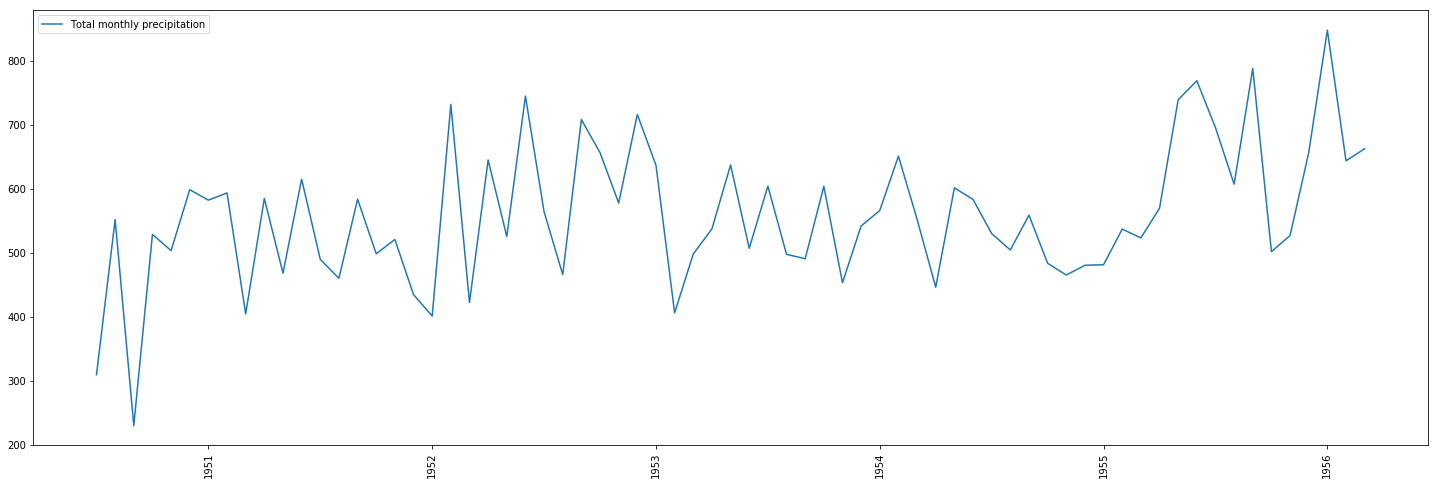

In [8]:
plt.figure(figsize=(25, 8))
x_yearly = total_yearly_precip.index.values
y_yearly = total_yearly_precip.total_precip['sum']
x_yearly_labels_index = total_yearly_precip.index
x_yearly_label = total_yearly_precip['year']
plt.xticks(x_labels_index, x_label, rotation=90) 
plt.plot(x_yearly, y_yearly, label='Total monthly precipitation')
plt.legend()
plt.show()

### Checking if the given time series is a stationary one

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
# Function to plot rolling average and rolling standard deviation and displaying 
# results of Dickey-Fuller Test for stationarity
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(12).mean() #średnia ruchoma z okresu 12 miesięcy(przesuwająca się o jeden zawsze)
    rolstd = timeseries.rolling(12).std() #odchylenie standardowe z okresu 12 miesięcy
    #Plot rolling statistics:
    plt.figure(figsize=(25,8));
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print('Results of Dickey-Fuller Test:')

    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

### Checking if the Total Yearly Precipitation is a stationary Time Series

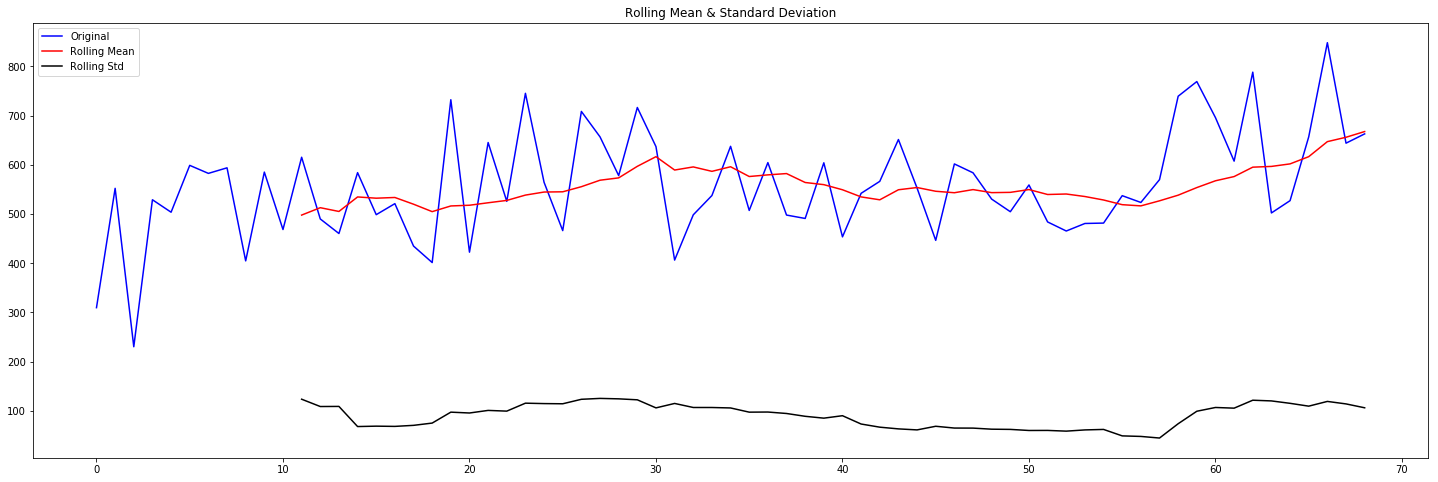

Results of Dickey-Fuller Test:
Test Statistic                -7.321721e+00
p-value                        1.189361e-10
#Lags Used                     0.000000e+00
Number of Observations Used    6.800000e+01
Critical Value (1%)           -3.530399e+00
Critical Value (5%)           -2.905087e+00
Critical Value (10%)          -2.590001e+00
dtype: float64


In [11]:
test_stationarity(total_yearly_precip.total_precip['sum'])

Conclusion: The Time Series is stationary.

### Checking if the Total Monthly Precipitation is a stationary Time Series

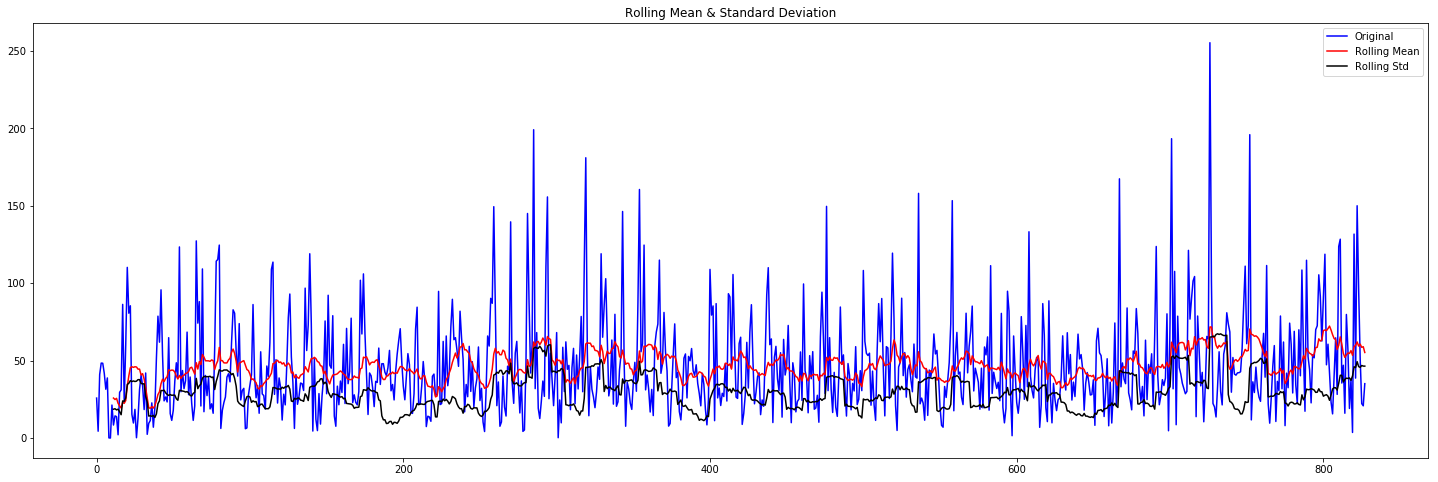

Results of Dickey-Fuller Test:
Test Statistic                -6.624051e+00
p-value                        5.937436e-09
#Lags Used                     1.500000e+01
Number of Observations Used    8.120000e+02
Critical Value (1%)           -3.438429e+00
Critical Value (5%)           -2.865106e+00
Critical Value (10%)          -2.568669e+00
dtype: float64


In [12]:
test_stationarity(data['total_precip'])

Conclusion: The Time Series is stationary, which makes using model like ARIMA possible to use without any further preprocessing.

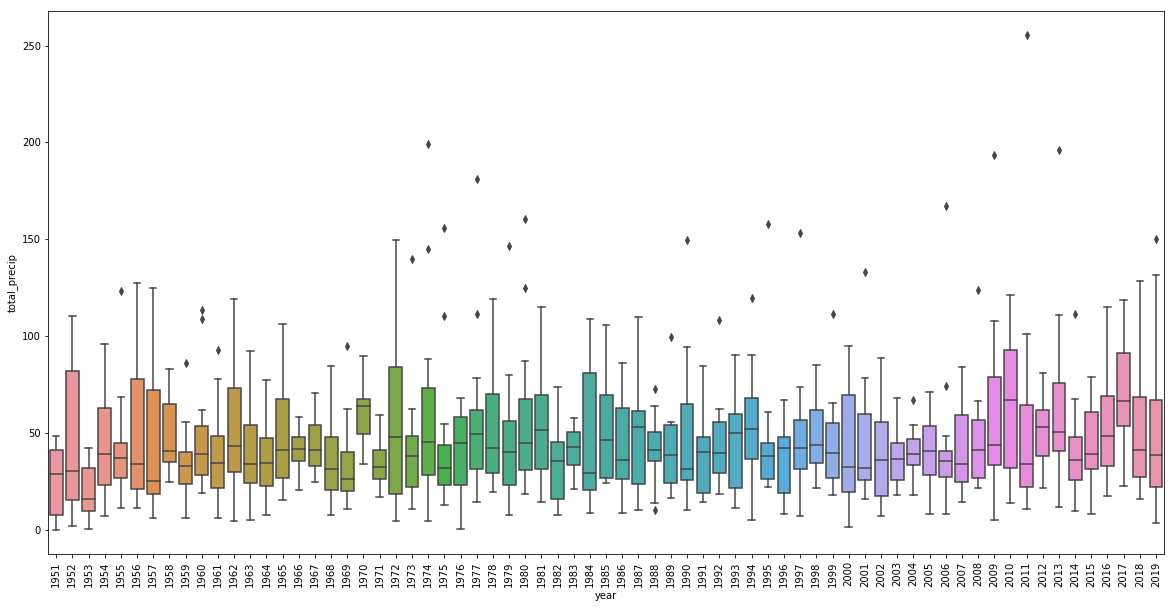

In [13]:
# Showing boxplot figures for each year of Time Series to sea how many outliers there are in the data.
plt.figure(figsize=(20,10))
precip_boxplot = sns.boxplot(data.year, data.total_precip)
x_labels = pd.DataFrame(pd.unique(data['year'])).rename({0:'year'}, axis=1)
plt.xticks(x_labels.index, x_labels.year, rotation=90) 
plt.show()

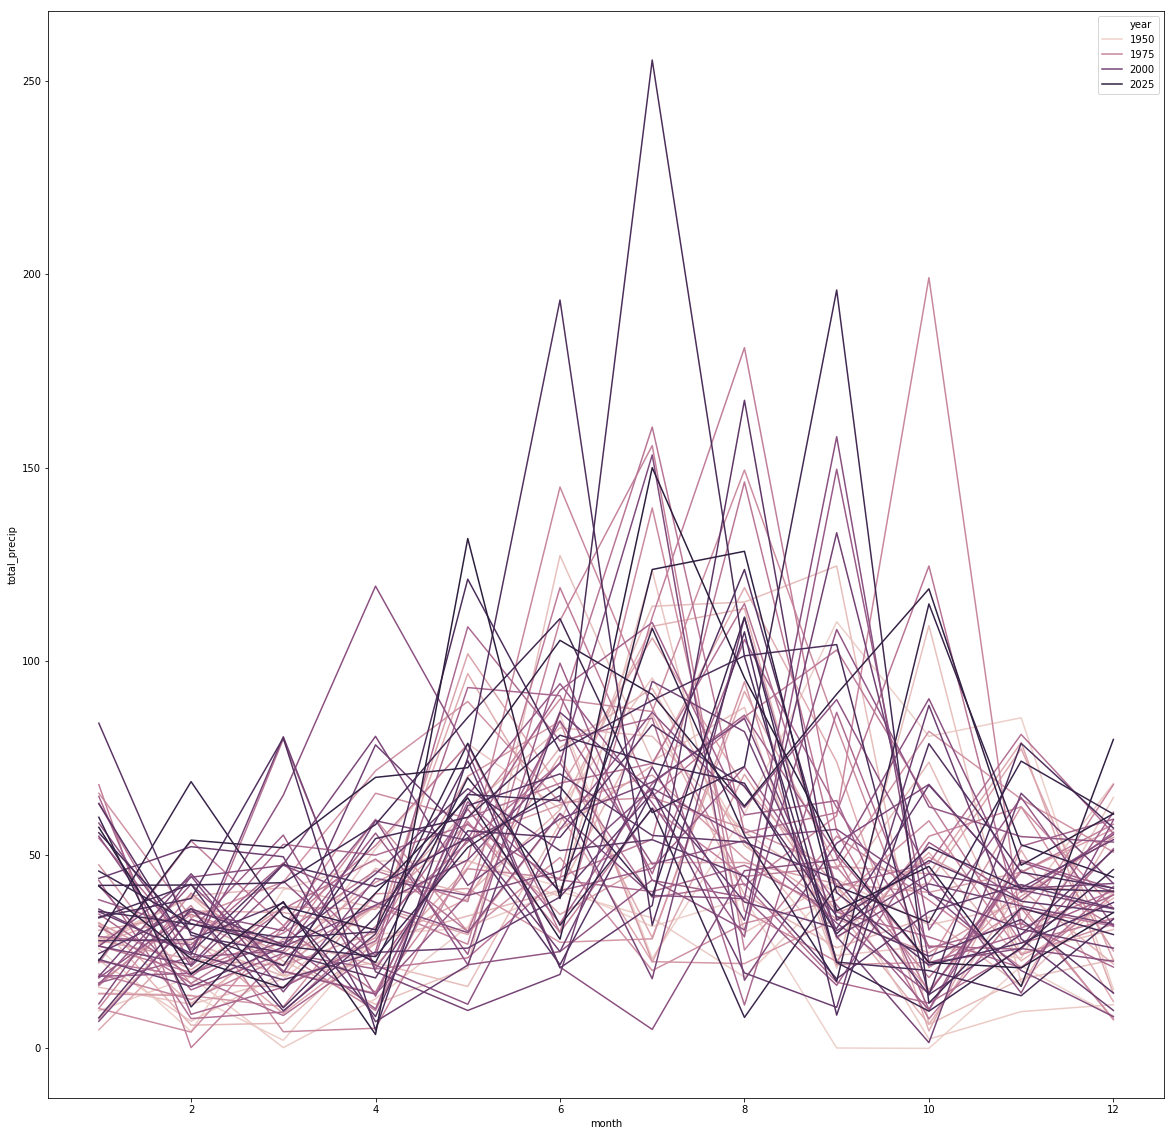

In [14]:
plt.figure(figsize=(20,20))
sns.lineplot(x=data.month, y=data.total_precip, hue=data.year)
plt.show()

Conclusions: boxplot figures and above presented Figure showing values of precipitation for 12 months for each year seperatly, confirms that no evident trend can be seen in data.

In [15]:
# Using linear regression model to check the coeficiant of linear model, which could be interpreted 
# as a "trend"

from sklearn.linear_model import LinearRegression
model = LinearRegression()
# zmienna objaśniające
X = np.array(data.index).reshape(-1, 1) # ta zmienna musi być macierzą albo ramką danych (wg konwencji duże X)
y = data.total_precip #zmienna objaśniana oznacza się małym y i to nie musi byc ramka lub macierz. moze byc wektor
model.fit(X, y) #dopasowujemy model do danych

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
a, b = (model.coef_, model.intercept_)
a

array([0.01445959])

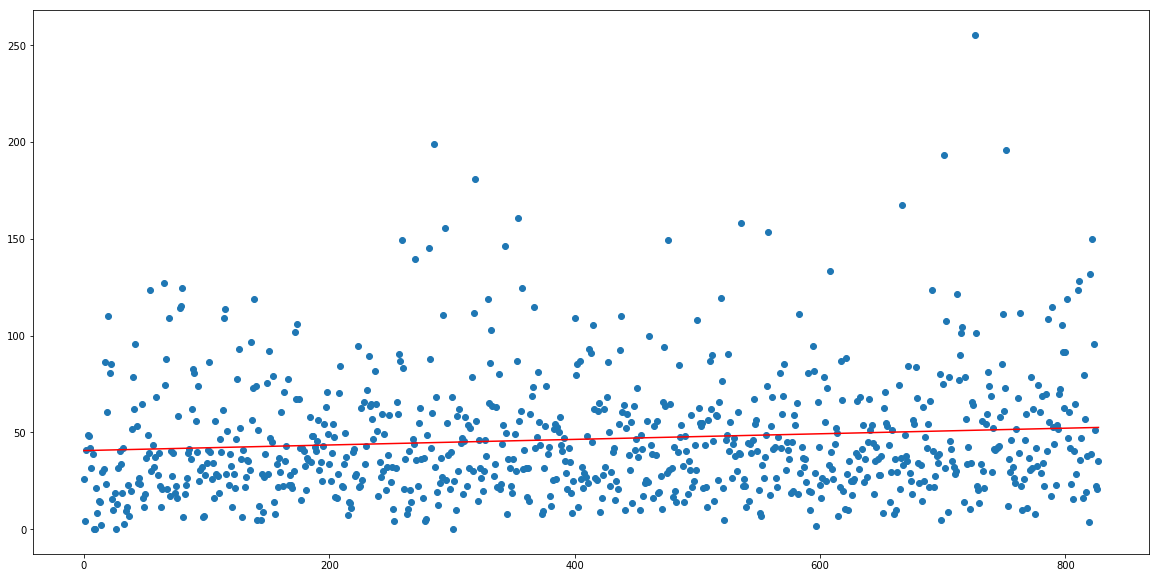

In [18]:
plt.figure(figsize=(20,10))
trend_line = a * X + b
plt.scatter(X, y, )
plt.plot(X,trend_line, c='r')
plt.show()

### The coeficiant from a linear regression model at the level of 0.01446 shows that the trend is negligible.

### What are the most freequent values of total montly precipitation? 

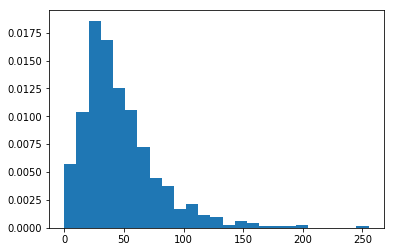

In [21]:
plt.hist(data.total_precip, bins=25, density=True)
plt.show()

### To proceed with data modeling please open a file: 04_Modeling_Precipitation.ipynb